# Old Code to Analyze Wingspan and Rim Protection

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Use the below cell to generate cumulative data. Otherwise skip to next cell

In [2]:
# load data defense and player measurements
data_pl = pd.read_csv("fdata\players_draft_measurements.csv")
data_1920 = pd.read_csv("fdata\players_RimDefense_2019_20.csv")
data_1819 = pd.read_csv("fdata\players_RimDefense_2018_19.csv")
data_1718 = pd.read_csv("fdata\players_RimDefense_2017_18.csv")
# data_1920.iloc[0:3,:]
# Merge Data
data0=pd.merge(data_pl,data_1920, left_on=['pID'], right_on=['pID'], how='inner')
data1=pd.merge(data0,data_1819, left_on=['pID'], right_on=['pID'], how='inner')
data =pd.merge(data1,data_1718, left_on=['pID'], right_on=['pID'], how='inner')
# remove unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data['D_FGM'] = data["D_FGM_1718"]+data["D_FGM_1819"]+data["D_FGM_1920"]
data['D_FGA'] = data["D_FGA_1718"]+data["D_FGA_1819"]+data["D_FGA_1920"]
data['D_FG_PCT'] = data['D_FGM']/data['D_FGA']*100 

data_cum = data[['Player_Name','Height','Wingspan','Stand_Reach','D_FG_PCT']]
data_cum.to_csv("fdata\players_RimDefense_2019_20_cum.csv")

In [9]:
data_cum = pd.read_csv("fdata\players_RimDefense_Wing_2017_20_cum.csv")
data_filt = data_cum.loc[(data_cum['Stand_Reach'] <= 100) & (data_cum['D_FG_PCT'] >= 0.66)]
data_filt = data_filt.reset_index(drop=True)
data_filt = data_filt.reset_index()
data_exp = data_filt.style.format({"Height": "{:.2f}'", 
                          "Wingspan": "{:.2f}'", 
                          "Stand_Reach": "{:.1f}'",
                          "D_FG_PCT": "{:.1f}%"
                          })


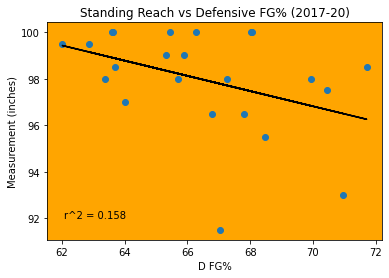

In [11]:
# Plotting Routine and r^2 value for FT Shooting and 3PT shooting
x = data_filt['D_FG_PCT']
y = data_filt['Stand_Reach']
m, b = np.polyfit(x, y, 1)
z = m*np.asarray(x)+b
# PLot figure
fig = plt.figure()
fig.patch.set(facecolor = "White")
fig.patch.set(alpha = 1.0)
ax = fig.add_subplot(111)
ax.patch.set(facecolor = "Orange")
ax.patch.set(alpha = 1.0)
plt.scatter(x,y)
plt.ylabel('Measurement (inches)')
plt.xlabel('D FG%')
plt.title('{0} vs Defensive FG% (2017-20)'.format('Standing Reach'))
# plt.xlim(0.6,0.95)
# plt.ylim(0.25,0.5)  
plt.plot(x,z,'k-')
correlation_matrix = np. corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2.
# plt.annotate("r^2 = {:.3f}".format(r_squared), (0.3, 0.45))
plt.text(0.05, 0.1, "r^2 = {:.3f}".format(r_squared), transform=plt.gca().transAxes)
# plt.savefig('D_FG__{0}.png'.format('Stand_Reach'), dpi=300)
plt.show()

# print(r_squared)
